# Imports

In [48]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB, COLOR_LAB2RGB, COLOR_LAB2BGR
import sys

#sys.path.append('../scripts/')
#from util import LABtoRGB


# Load dataset

In [6]:
ab1 = np.load("../data/image-colorization/ab/ab/ab1.npy")
ab2 = np.load("../data/image-colorization/ab/ab/ab2.npy")
ab3 = np.load("../data/image-colorization/ab/ab/ab3.npy")
l = np.load("../data/image-colorization/l/gray_scale.npy")

In [8]:
# Concatenate the numpy files
ab = np.concatenate((ab1,ab2,ab3),axis=0)

In [17]:
print(ab.shape)
print(l.shape)

(25000, 224, 224, 2)
(25000, 224, 224)


# Merge L and ab arrays

In [47]:
def createLab(n=5):
    lab = np.zeros((n,224,224,3))
    
    lab[:,:,:,0] = l[0:n:]
    lab[:,:,:,1:] = ab[0:n:]    

    return lab.astype("uint8")

# Demo

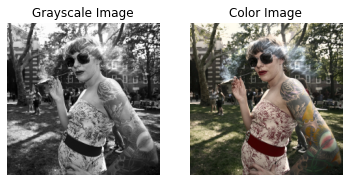

In [45]:
#img_lab = np.concatenate((ab[0],l[0][:,:,None]),axis=2)
lab = createLab(1)
img_lab = lab[0]

fig = plt.figure()
fig1 = fig.add_subplot(1, 2, 1)
fig1.title.set_text("Grayscale Image")
plt.axis('off')
plt.imshow(img_lab[:,:,0], cmap='gray')
fig2 = fig.add_subplot(1, 2, 2)
fig2.title.set_text("Color Image")
plt.axis('off')
plt.imshow(cvtColor(img_lab,COLOR_LAB2RGB))

# Convert Data to Tensors

In [49]:
lab = createLab(100)
labtensor = torch.tensor(lab)